In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn import preprocessing

In [3]:
dataset = pd.read_csv('D:/UFV/Comp 455/Project/Spotify6.csv')
x = dataset.iloc[:,:-1].values
genre = dataset.iloc[:, -1]
encoder = preprocessing.LabelEncoder()
y = encoder.fit_transform(genre)

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

<AxesSubplot:>

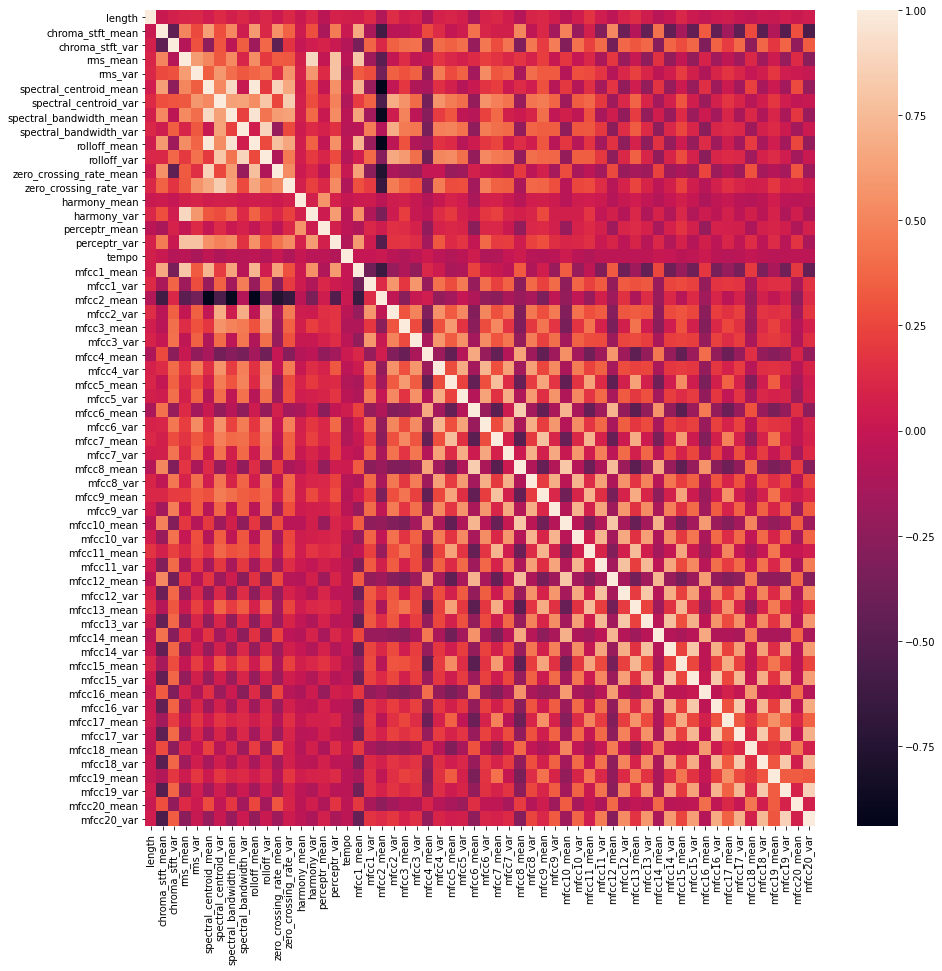

In [6]:
import seaborn as sns
corr_data = dataset.iloc[:,:-1].corr()
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr_data)

In [7]:
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(x_train, y_train) 
svm_predictions = svm_model_linear.predict(x_test)

In [8]:
accuracy = svm_model_linear.score(x_test, y_test)
cm = confusion_matrix(y_test, svm_predictions)

In [9]:
print(accuracy)
print(cm)

0.676
[[16  0  1  0  0  2  1  0  0  1]
 [ 1 14  0  0  0  1  0  0  0  0]
 [ 2  1 21  2  0  1  0  1  0  2]
 [ 1  0  1 13  6  0  0  1  1  3]
 [ 2  0  0  2 20  0  1  0  3  0]
 [ 0  4  1  1  0 18  0  0  1  1]
 [ 1  0  0  1  0  0 23  0  2  0]
 [ 0  0  2  3  0  0  0 16  3  2]
 [ 2  0  0  0  3  0  0  3 11  1]
 [ 2  0  1  5  1  1  1  1  1 17]]


In [10]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(x_train, y_train) 
gnb_predictions = gnb.predict(x_test)

In [11]:
accuracy = gnb.score(x_test, y_test)  
cm = confusion_matrix(y_test, gnb_predictions) 
print(accuracy)
print(cm)

0.456
[[13  0  0  0  0  2  5  0  1  0]
 [ 0 14  0  0  0  2  0  0  0  0]
 [12  1  7  4  0  0  3  0  0  3]
 [ 0  0  3 10  2  0  3  0  4  4]
 [ 8  0  0  1 10  0  3  1  4  1]
 [ 9  4  1  3  0  6  0  0  2  1]
 [ 2  0  0  2  1  0 21  0  1  0]
 [ 0  0  1  2  0  1  0 20  1  1]
 [ 3  0  1  1  1  1  0  3  8  2]
 [ 9  0  0  3  0  1 12  0  0  5]]


In [12]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2).fit(x_train, y_train) 

In [13]:
accuracy = knn.score(x_test, y_test) 
print(accuracy) 
knn_predictions = knn.predict(x_test)  
cm = confusion_matrix(y_test, knn_predictions)
print(cm)

0.644
[[18  0  0  0  0  1  0  0  1  1]
 [ 0 16  0  0  0  0  0  0  0  0]
 [ 3  2 20  2  0  2  0  0  0  1]
 [ 0  0  3 17  2  0  1  1  1  1]
 [ 1  0  0  7 12  0  0  2  6  0]
 [ 0  4  2  4  0 15  0  0  1  0]
 [ 2  0  1  3  0  0 20  0  0  1]
 [ 0  0  0  5  0  0  0 19  2  0]
 [ 1  0  3  2  2  0  0  1 11  0]
 [ 2  0  4  7  0  3  1  0  0 13]]


In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 45)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [15]:
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(x_train_pca, y_train) 
svm_predictions = svm_model_linear.predict(x_test_pca)
accuracy = svm_model_linear.score(x_test_pca, y_test)
cm = confusion_matrix(y_test, svm_predictions)
print(accuracy)
print(cm)

0.688
[[17  0  1  0  0  1  1  0  0  1]
 [ 1 14  0  0  0  1  0  0  0  0]
 [ 3  1 20  2  0  2  0  0  0  2]
 [ 1  0  1 13  5  0  0  1  2  3]
 [ 3  0  0  3 17  0  1  0  4  0]
 [ 0  4  0  0  0 19  0  0  1  2]
 [ 1  0  0  1  0  0 23  0  2  0]
 [ 0  0  1  2  0  0  0 18  3  2]
 [ 1  0  0  0  3  0  0  3 12  1]
 [ 2  0  1  4  1  1  1  1  0 19]]
